In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import mpl_finance as mplf
import matplotlib.dates as mdates
from matplotlib.lines import Line2D

In [2]:
Stock_ETF = pd.read_csv('ETF/data/510300.csv')
Stock_ETF = Stock_ETF.set_index('date')
Stock_ETF.index = pd.to_datetime(Stock_ETF.index)
Stock_ETF = Stock_ETF.sort_index(axis=0, ascending=True)

In [3]:
import Risk_Ratio_Functions

In [4]:
Risk_Ratio = Risk_Ratio_Functions.Risk_Ratio(Stock_ETF)
Risk_Ratio = Risk_Ratio[['Decision','MAJCQX']]
Risk_Ratio.tail()

,Decision,MAJCQX
date,,
2018-06-04,36.72,31.280000
2018-06-05,46.24,36.266667
2018-06-06,51.68,44.880000
2018-06-07,53.04,50.320000
2018-06-08,29.92,44.880000


In [5]:
DA = 6
ZFXF_YCWW = pd.DataFrame()
ZFXF_YCWW['LLV_min'] = Stock_ETF['close'].rolling(window=DA).min()
ZFXF_YCWW['HHV_max'] = Stock_ETF['close'].rolling(window=DA).max()
ZFXF_YCWW['ABS'] = np.abs(ZFXF_YCWW['HHV_max']/ZFXF_YCWW['LLV_min']-1)
ZFXF_YCWW['MAX'] = ZFXF_YCWW['ABS'].rolling(window=DA).max()
ZFXF_YCWW['DA'] = DA
ZFXF_YCWW.loc[ZFXF_YCWW['MAX']>0.1,'DA'] = 3
ZFXF_YCWW['Tomorrow'] = Stock_ETF['close'].rolling(window=DA).mean()
ZFXF_YCWW.loc[ZFXF_YCWW['DA'] == 3,'Tomorrow'] = Stock_ETF['close'].rolling(window=3).mean()
ZFXF_YCWW['YCWW'] = ZFXF_YCWW['Tomorrow'].shift(1)
ZFXF_YCWW.tail()

,LLV_min,HHV_max,ABS,MAX,DA,Tomorrow,YCWW
date,,,,,,,
2018-06-04,3.727,3.835,0.028978,0.033271,6,3.792500,3.792000
2018-06-05,3.727,3.846,0.031929,0.033271,6,3.794333,3.792500
2018-06-06,3.727,3.846,0.031929,0.033271,6,3.801000,3.794333
2018-06-07,3.777,3.846,0.018268,0.031929,6,3.819500,3.801000
2018-06-08,3.777,3.846,0.018268,0.031929,6,3.816833,3.819500


In [6]:
ZFXF_YCWW['Buy_point'] = 0
ZFXF_YCWW.loc[Stock_ETF['close'] > ZFXF_YCWW['YCWW'],'Buy_point'] = 1
ZFXF_YCWW['Sell_point'] = 0
ZFXF_YCWW.loc[Stock_ETF['close'] < ZFXF_YCWW['YCWW'],'Sell_point'] = -1
ZFXF_YCWW['Points'] = ZFXF_YCWW['Buy_point']+ZFXF_YCWW['Sell_point']

In [7]:
g = len(ZFXF_YCWW)
ZFXF_YCWW['order'] = np.arange(0,g,1)
ZFXF_YCWW.loc[g-1:g,'Points'] = -1

In [8]:
ZFXF_YCWW['BS_point'] = ZFXF_YCWW['Points'].shift(1)
ZFXF_YCWW['BS_point'] = ZFXF_YCWW['BS_point'].fillna(-1)
ZFXF_YCWW['BS_point'] = (ZFXF_YCWW['Points'] - ZFXF_YCWW['BS_point'])/2+ZFXF_YCWW['Points']
ZFXF_YCWW.tail()

,LLV_min,HHV_max,ABS,MAX,DA,Tomorrow,YCWW,Buy_point,Sell_point,Points,order,BS_point
date,,,,,,,,,,,,
2018-06-04,3.727,3.835,0.028978,0.033271,6,3.792500,3.792000,1,0,1,1465,2.0
2018-06-05,3.727,3.846,0.031929,0.033271,6,3.794333,3.792500,1,0,1,1466,1.0
2018-06-06,3.727,3.846,0.031929,0.033271,6,3.801000,3.794333,1,0,1,1467,1.0
2018-06-07,3.777,3.846,0.018268,0.031929,6,3.819500,3.801000,1,0,1,1468,1.0
2018-06-08,3.777,3.846,0.018268,0.031929,6,3.816833,3.819500,0,-1,-1,1469,-2.0


In [9]:
Stock_ETF_Risk_Ratio_ZFXF_YCWW = pd.concat([Stock_ETF,Risk_Ratio,ZFXF_YCWW[['YCWW','Tomorrow','BS_point']]], axis=1)
Stock_ETF_Risk_Ratio_ZFXF_YCWW.tail()

,open,high,low,close,volume,amount,Decision,MAJCQX,YCWW,Tomorrow,BS_point
date,,,,,,,,,,,
2018-06-04,3.797,3.818,3.784,3.814,126079680,47968.090,36.72,31.280000,3.792000,3.792500,2.0
2018-06-05,3.810,3.850,3.803,3.846,104886000,40123.789,46.24,36.266667,3.792500,3.794333,1.0
2018-06-06,3.841,3.849,3.831,3.839,83502816,32063.799,51.68,44.880000,3.794333,3.801000,1.0
2018-06-07,3.853,3.869,3.831,3.838,109814320,42290.070,53.04,50.320000,3.801000,3.819500,1.0
2018-06-08,3.830,3.830,3.768,3.787,135333280,51353.004,29.92,44.880000,3.819500,3.816833,-2.0


In [10]:
stadate = '2018-04-11'
enddate = '2018-06-07'
Stock_ETF_Risk_Ratio_ZFXF_YCWW = Stock_ETF_Risk_Ratio_ZFXF_YCWW[Stock_ETF_Risk_Ratio_ZFXF_YCWW.index >= pd.to_datetime(stadate)]
Stock_ETF_Risk_Ratio_ZFXF_YCWW = Stock_ETF_Risk_Ratio_ZFXF_YCWW[Stock_ETF_Risk_Ratio_ZFXF_YCWW.index <= pd.to_datetime(enddate)]
k = len(Stock_ETF_Risk_Ratio_ZFXF_YCWW)

In [11]:
k

40

In [12]:
Stock_ETF_Risk_Ratio_ZFXF_YCWW['date'] = Stock_ETF_Risk_Ratio_ZFXF_YCWW.index
Stock_ETF_Risk_Ratio_ZFXF_YCWW = Stock_ETF_Risk_Ratio_ZFXF_YCWW.reset_index(drop=True)
Stock_ETF_Risk_Ratio_ZFXF_YCWW['id'] = Stock_ETF_Risk_Ratio_ZFXF_YCWW.index+1
Stock_ETF_Risk_Ratio_ZFXF_YCWW['preds'] = (Stock_ETF_Risk_Ratio_ZFXF_YCWW['Tomorrow']-Stock_ETF_Risk_Ratio_ZFXF_YCWW['close'])/Stock_ETF_Risk_Ratio_ZFXF_YCWW['close']*100

In [13]:
Stock_ETF_Risk_Ratio_ZFXF_YCWW.head()

,open,high,low,close,volume,amount,Decision,MAJCQX,YCWW,Tomorrow,BS_point,date,id,preds
0,3.938,3.957,3.926,3.933,136495504,53793.754,50.32,40.346667,3.877667,3.883833,1.0,2018-04-11,1,-1.250106
1,3.932,3.938,3.891,3.892,96730312,37860.625,47.6,48.506667,3.883833,3.885333,1.0,2018-04-12,2,-0.171292
2,3.915,3.927,3.858,3.865,121246776,47049.320,38.08,45.333333,3.885333,3.886500,-2.0,2018-04-13,3,0.556274
3,3.858,3.870,3.791,3.804,114159640,43629.645,28.56,38.080000,3.886500,3.879167,-1.0,2018-04-16,4,1.975990
4,3.815,3.820,3.745,3.748,138299808,52363.035,20.4,29.013333,3.879167,3.861667,-1.0,2018-04-17,5,3.032729


In [14]:
Stock_ETF_Risk_Ratio_ZFXF_YCWW.tail()

,open,high,low,close,volume,amount,Decision,MAJCQX,YCWW,Tomorrow,BS_point,date,id,preds
35,3.786,3.799,3.760,3.777,121025472,45736.316,25.84,25.386667,3.799167,3.792000,-1.0,2018-06-01,36,0.397141
36,3.797,3.818,3.784,3.814,126079680,47968.090,36.72,31.280000,3.792000,3.792500,2.0,2018-06-04,37,-0.563713
37,3.810,3.850,3.803,3.846,104886000,40123.789,46.24,36.266667,3.792500,3.794333,1.0,2018-06-05,38,-1.343387
38,3.841,3.849,3.831,3.839,83502816,32063.799,51.68,44.880000,3.794333,3.801000,1.0,2018-06-06,39,-0.989841
39,3.853,3.869,3.831,3.838,109814320,42290.070,53.04,50.320000,3.801000,3.819500,1.0,2018-06-07,40,-0.482022


In [15]:
Stock_ETF_Risk_Ratio_ZFXF_YCWW_ochl = Stock_ETF_Risk_Ratio_ZFXF_YCWW[['id','open','close','high','low']]
Stock_ETF_Risk_Ratio_ZFXF_YCWW_date = Stock_ETF_Risk_Ratio_ZFXF_YCWW.set_index('date')

In [16]:
Stock_ETF_Risk_Ratio_ZFXF_YCWW_date.head()

,open,high,low,close,volume,amount,Decision,MAJCQX,YCWW,Tomorrow,BS_point,id,preds
date,,,,,,,,,,,,,
2018-04-11,3.938,3.957,3.926,3.933,136495504,53793.754,50.32,40.346667,3.877667,3.883833,1.0,1,-1.250106
2018-04-12,3.932,3.938,3.891,3.892,96730312,37860.625,47.6,48.506667,3.883833,3.885333,1.0,2,-0.171292
2018-04-13,3.915,3.927,3.858,3.865,121246776,47049.320,38.08,45.333333,3.885333,3.886500,-2.0,3,0.556274
2018-04-16,3.858,3.870,3.791,3.804,114159640,43629.645,28.56,38.080000,3.886500,3.879167,-1.0,4,1.975990
2018-04-17,3.815,3.820,3.745,3.748,138299808,52363.035,20.4,29.013333,3.879167,3.861667,-1.0,5,3.032729


In [17]:
Trade_date = '2018-05-30'
Trade_price = 3.754
Trade = Stock_ETF_Risk_Ratio_ZFXF_YCWW.loc[Stock_ETF_Risk_Ratio_ZFXF_YCWW['date'] == pd.to_datetime(Trade_date),['date','id']]
Trade['price'] = Trade_price
Trade.tail()

,date,id,price
33,2018-05-30,34,3.754


In [18]:
tp = Trade_price
idt = Trade.index.values+1

In [19]:
idt

array([34], dtype=int64)

In [20]:
datarray = Stock_ETF_Risk_Ratio_ZFXF_YCWW_ochl.values
De = Stock_ETF_Risk_Ratio_ZFXF_YCWW['Decision'].values
JCQX = Stock_ETF_Risk_Ratio_ZFXF_YCWW['MAJCQX'].values
Id = Stock_ETF_Risk_Ratio_ZFXF_YCWW['id'].values
idx = np.arange(0, k, 1)
date = Stock_ETF_Risk_Ratio_ZFXF_YCWW_date.index[idx].date
date_last = Stock_ETF_Risk_Ratio_ZFXF_YCWW_date.index.date[-1]

In [21]:
Id

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40], dtype=int64)

In [22]:
len(Id)

40

In [23]:
De

array([50.32, 47.6, 38.080000000000005, 28.560000000000002,
       20.400000000000002, 14.96, 25.840000000000003, 19.040000000000003,
       23.12, 48.96, 42.160000000000004, 32.64, 27.200000000000003,
       38.080000000000005, 44.88, 36.720000000000006, 57.120000000000005,
       63.92, 61.2, 66.64, 62.56, 66.64, 65.28, 62.56, 39.440000000000005,
       53.040000000000006, 53.040000000000006, 47.6, 42.160000000000004,
       25.840000000000003, 23.12, 34.0, 21.76, 19.040000000000003, 31.28,
       25.840000000000003, 36.720000000000006, 46.24, 51.68000000000001,
       53.040000000000006], dtype=object)

In [24]:
JCQX

array([ 40.34666667,  48.50666667,  45.33333333,  38.08      ,
        29.01333333,  21.30666667,  20.4       ,  19.94666667,
        22.66666667,  30.37333333,  38.08      ,  41.25333333,
        34.        ,  32.64      ,  36.72      ,  39.89333333,
        46.24      ,  52.58666667,  60.74666667,  63.92      ,
        63.46666667,  65.28      ,  64.82666667,  64.82666667,
        55.76      ,  51.68      ,  48.50666667,  51.22666667,
        47.6       ,  38.53333333,  30.37333333,  27.65333333,
        26.29333333,  24.93333333,  24.02666667,  25.38666667,
        31.28      ,  36.26666667,  44.88      ,  50.32      ])

In [25]:
idx

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39])

In [26]:
len(idx)

40

In [27]:
len(date)

40

In [28]:
date

array([datetime.date(2018, 4, 11), datetime.date(2018, 4, 12),
       datetime.date(2018, 4, 13), datetime.date(2018, 4, 16),
       datetime.date(2018, 4, 17), datetime.date(2018, 4, 18),
       datetime.date(2018, 4, 19), datetime.date(2018, 4, 20),
       datetime.date(2018, 4, 23), datetime.date(2018, 4, 24),
       datetime.date(2018, 4, 25), datetime.date(2018, 4, 26),
       datetime.date(2018, 4, 27), datetime.date(2018, 5, 2),
       datetime.date(2018, 5, 3), datetime.date(2018, 5, 4),
       datetime.date(2018, 5, 7), datetime.date(2018, 5, 8),
       datetime.date(2018, 5, 9), datetime.date(2018, 5, 10),
       datetime.date(2018, 5, 11), datetime.date(2018, 5, 14),
       datetime.date(2018, 5, 15), datetime.date(2018, 5, 16),
       datetime.date(2018, 5, 17), datetime.date(2018, 5, 18),
       datetime.date(2018, 5, 21), datetime.date(2018, 5, 22),
       datetime.date(2018, 5, 23), datetime.date(2018, 5, 24),
       datetime.date(2018, 5, 25), datetime.date(2018, 5, 28)

In [29]:
date_last

datetime.date(2018, 6, 7)

In [30]:
buy_point = Stock_ETF_Risk_Ratio_ZFXF_YCWW.loc[Stock_ETF_Risk_Ratio_ZFXF_YCWW['BS_point']==2.0,['YCWW','BS_point']]
sell_point = Stock_ETF_Risk_Ratio_ZFXF_YCWW.loc[Stock_ETF_Risk_Ratio_ZFXF_YCWW['BS_point']==-2.0,['YCWW','BS_point']]
buy = buy_point['YCWW'].values.round(3)
idb = buy_point.index+1
sell = sell_point['YCWW'].values.round(3)
ids = sell_point.index+1

In [31]:
buy_point

,YCWW,BS_point
9,3.772167,2.0
14,3.783167,2.0
16,3.774333,2.0
25,3.890833,2.0
36,3.792000,2.0


In [32]:
sell_point

,YCWW,BS_point
2,3.885333,-2.0
11,3.791333,-2.0
15,3.786833,-2.0
23,3.891500,-2.0
28,3.898000,-2.0


In [33]:
if buy_point.index[0] > sell_point.index[0]:
    sell_point = sell_point.iloc[1:,:]

In [34]:
sell_point

,YCWW,BS_point
11,3.791333,-2.0
15,3.786833,-2.0
23,3.891500,-2.0
28,3.898000,-2.0


In [35]:
sell2 = sell_point['YCWW'].values.round(3)
ids2 = sell_point.index+1

In [36]:
idp = Stock_ETF_Risk_Ratio_ZFXF_YCWW.index[-1]+1
idp

40

In [37]:
ptmr = Stock_ETF_Risk_Ratio_ZFXF_YCWW['Tomorrow'].tail(1).values.round(4)
ptmr = float(ptmr[0])

In [38]:
ptd = Stock_ETF_Risk_Ratio_ZFXF_YCWW['YCWW'].tail(1).values.round(4)
ptd = float(ptd[0])

In [39]:
plt.figure(2,figsize=(14,6), dpi=80)
ax1 = plt.subplot(111)

In [40]:
plt.plot(Id, De, color ='Orange', linewidth=2.0, alpha=0.8)
plt.plot(Id, JCQX, color ='Brown', linewidth=2.0, alpha=0.8)
plt.axhline(y=20, color='cyan', linewidth=1.0, alpha=1.0)
plt.axhline(y=60, color='yellow', linewidth=1.0, alpha=1.0)
plt.axhline(y=70, color='gold', linewidth=1.0, alpha=1.0)
plt.axvline(x=Id[0], color='LightPink', linestyle='--', linewidth=1.0, alpha=1.0)
plt.axvline(x=Id[-1], color='MediumOrchid', linestyle='--', linewidth=1.0, alpha=1.0)
plt.axvline(x=Id[-1]+1, color='RosyBrown', linestyle='--', linewidth=1.0, alpha=1.0)
plt.grid(linestyle=':', alpha=0.5)

In [41]:
plt.xticks(idx, date)
plt.xticks(rotation=45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39]), <a list of 40 Text xticklabel objects>)

In [42]:
# plt.xlim(0,k+1,1)
plt.ylim(10,80,10)

(10, 80)

In [43]:
ax2 = ax1.twinx()
mplf.candlestick_ochl(ax2, datarray, width=0.8, colorup='red', colordown='green', alpha=0.6)
plt.grid(linestyle=':', alpha=0.5)

In [44]:
plt.scatter(idb, buy, color ='blue', s=50, alpha=1.0, zorder=2)
plt.scatter(ids, sell, color ='brown', s=50, alpha=1.0, zorder=3)
plt.scatter(idt, tp, color ='black', s=80, alpha=1.0, zorder=4)
plt.scatter(idt, tp, color ='yellow', s=30, alpha=1.0, zorder=5)
plt.scatter(idp, ptd, color ='black', s=80, alpha=1.0, zorder=6)
plt.scatter(idp, ptd, color ='cyan', s=30, alpha=1.0, zorder=7)
plt.scatter(idp+1, ptmr, color ='black', s=80, alpha=1.0, zorder=6)
plt.scatter(idp+1, ptmr, color ='Lime', s=30, alpha=1.0, zorder=7)

In [45]:
for a,b in zip(ids,sell):
    ax2.text(a, b+0.01, b, ha='center', va= 'center', bbox = dict(facecolor = "blue", alpha = 0.2))

In [46]:
for c,d in zip(idb,buy):
    ax2.text(c, d-0.015, d, ha='center', va= 'center', bbox = dict(facecolor = "magenta", alpha = 0.2))

In [47]:
ax2.text(idt, tp*1.004, tp, ha='center', va= 'center', bbox = dict(facecolor = "yellow", alpha = 0.2))

In [48]:
ax2.text(idp, ptd*1.004, ptd, ha='center', va= 'center', bbox = dict(facecolor = "cyan", alpha = 0.2))
ax2.text(idp+1, ptmr*1.004, ptmr, ha='center', va= 'center', bbox = dict(facecolor = "Lime", alpha = 0.2))

In [49]:
for m,n,p,q in zip(idb,ids2,buy,sell2):
    ax2.add_line(Line2D((m,n), (p,q), linewidth=3, color='magenta', zorder=1))

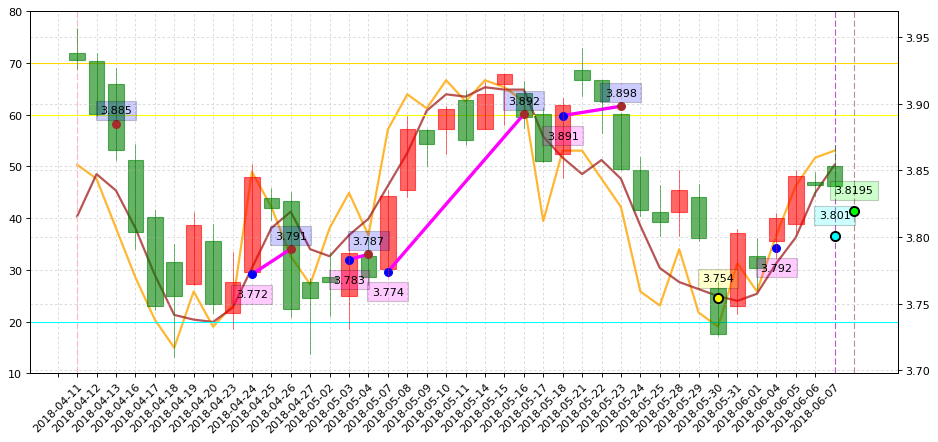

In [50]:
plt.show()